# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## WAVES 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_waves_train_data = pd.read_csv('vader_textblob_waves_train_data').drop('Unnamed: 0',axis=1)
flair_waves_train_data = pd.read_csv('flair_waves_train_data.csv').drop('Unnamed: 0',axis=1)
waves_train_data = pd.read_csv('waves_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_waves_test_data = pd.read_csv('vader_textblob_waves_test_data').drop('Unnamed: 0',axis=1)
flair_waves_test_data = pd.read_csv('flair_waves_test_data.csv').drop('Unnamed: 0',axis=1)
waves_test_data = pd.read_csv('waves_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(waves_train_data,waves_test_data)

In [6]:
coin =  gfmodel.coin_data_load('iota')

  0%|          | 0/1801 [00:00<?, ?it/s]

In [7]:
gfmodel.convert_train_data(vader_textblob_waves_train_data,flair_waves_train_data)
gfmodel.convert_test_data(vader_textblob_waves_test_data,flair_waves_test_data)

(8630, 11)
(8630, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/8630 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/29573 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,100207,74.9459,0.083273,89.355551,0.099284,183.187993,0.203542,1188847,1320.941111,...,0.6151,26478803.0,1.709694e+09,2022-04-29,0.6151,0.6171,0.5663,0.5732,33286020.0,1.593169e+09
1,2022-04-29,184040,219.4899,0.127388,166.134299,0.096422,558.018190,0.323864,2995754,1738.684852,...,0.5732,33286020.0,1.593169e+09,2022-04-30,0.5731,0.5856,0.5158,0.5305,42906757.0,1.474464e+09
2,2022-04-30,149688,174.8343,0.125780,140.353130,0.100973,331.897090,0.238775,3124497,2247.839568,...,0.5305,42906757.0,1.474464e+09,2022-05-01,0.5307,0.5494,0.5204,0.5463,36862247.0,1.518444e+09
3,2022-05-01,158064,168.2374,0.118310,170.415788,0.119842,319.761194,0.224867,2695315,1895.439522,...,0.5463,36862247.0,1.518444e+09,2022-05-02,0.5463,0.5515,0.5125,0.5332,43132832.0,1.482163e+09
4,2022-05-02,177978,135.1043,0.083968,145.407126,0.090371,254.935193,0.158443,3118157,1937.947172,...,0.5332,43132832.0,1.482163e+09,2022-05-03,0.5332,0.5468,0.4902,0.5018,58531118.0,1.394754e+09
5,2022-05-03,130955,77.1079,0.064579,106.306642,0.089034,172.266791,0.144277,2886253,2417.297320,...,0.5018,58531118.0,1.394754e+09,2022-05-04,0.5018,0.5568,0.5000,0.5538,49521445.0,1.539320e+09
6,2022-05-04,97412,105.7273,0.122370,97.918920,0.113332,282.846316,0.327368,1236787,1431.466435,...,0.5538,49521445.0,1.539320e+09,2022-05-05,0.5538,0.5605,0.4884,0.4989,49050583.0,1.386688e+09
7,2022-05-05,125369,114.8947,0.103323,113.297294,0.101886,313.447891,0.281878,3234927,2909.107014,...,0.4989,49050583.0,1.386688e+09,2022-05-06,0.4989,0.5045,0.4789,0.4941,32315310.0,1.373352e+09
8,2022-05-06,198047,210.5292,0.120097,144.968524,0.082697,500.414541,0.285462,3793160,2163.810610,...,0.4941,32315310.0,1.373352e+09,2022-05-07,0.4941,0.4979,0.4690,0.4773,21689049.0,1.326703e+09
9,2022-05-07,213223,152.5361,0.078952,132.654536,0.068662,416.857801,0.215765,4773759,2470.889752,...,0.4773,21689049.0,1.326703e+09,2022-05-08,0.4774,0.4812,0.4609,0.4654,30098325.0,1.293484e+09


In [8]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-1.184783,-1.207973,-0.751832,-1.108584,0.580477,-1.282210,-0.209503,-1.699656,-1.302894,-1.303033,...,1.525598,-0.915892,1.525675,1.525243,1.484747,1.396773,1.333857,-0.718977,1.333706,2022-04-28
1,-0.122988,0.523808,1.261926,0.213271,0.383618,1.362062,1.808886,-0.346050,-0.543848,-0.346848,...,1.110833,-0.673893,1.110674,1.109728,1.142674,0.896156,0.883279,-0.369415,0.883031,2022-04-29
2,-0.558077,-0.011211,1.188517,-0.230589,0.696672,-0.233129,0.381521,-0.249605,0.381293,-0.098561,...,0.688150,-0.331873,0.687911,0.690255,0.749560,0.941756,1.050003,-0.589038,1.050006,2022-04-30
3,-0.451990,-0.090248,0.847543,0.286983,1.994357,-0.318742,0.148222,-0.571118,-0.259023,0.321488,...,0.844553,-0.546757,0.844544,0.844590,0.772365,0.863442,0.911770,-0.361201,0.912262,2022-05-01
4,-0.199767,-0.487216,-0.720123,-0.143577,-0.032493,-0.776063,-0.966033,-0.254354,-0.181786,-0.308968,...,0.714877,-0.323836,0.715331,0.714988,0.721325,0.642377,0.580432,0.198285,0.580403,2022-05-02
5,-0.795341,-1.182070,-1.605162,-0.816747,-0.124449,-1.359254,-1.203669,-0.428080,0.689200,-0.843499,...,0.404051,0.223577,0.404025,0.404342,0.829920,0.739527,1.129145,-0.129075,1.129265,2022-05-03
6,-1.220184,-0.839181,1.032834,-0.961154,1.546622,-0.579162,1.867667,-1.663743,-1.102068,-1.007242,...,0.918794,-0.096719,0.918895,0.918789,0.870100,0.624533,0.549830,-0.146183,0.549781,2022-05-04
7,-0.866091,-0.729347,0.163379,-0.696393,0.759434,-0.363280,1.104564,-0.166878,1.582824,-0.637752,...,0.375344,-0.113458,0.375300,0.375651,0.261969,0.530358,0.499180,-0.754247,0.499151,2022-05-05
8,0.054419,0.416450,0.929075,-0.151128,-0.560245,0.955692,1.164689,0.251310,0.228611,0.597117,...,0.327829,-0.708402,0.327805,0.328164,0.190297,0.432217,0.321903,-1.140345,0.322043,2022-05-06
9,0.246632,-0.278365,-0.949067,-0.363131,-1.525529,0.366234,-0.004469,0.985905,0.786578,0.470873,...,0.161527,-1.086169,0.161665,0.162947,0.008943,0.351919,0.196333,-0.834800,0.195921,2022-05-07


In [9]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
gfmodel.make_model()

In [11]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,0.586493,0.5732,2022-04-28,26478803.0,0.6151,2022-04-29,-68.119005,-0.028607,True
1,0.541789,0.5305,2022-04-29,33286020.0,0.5732,2022-04-30,-74.494068,-0.031411,True
2,0.509741,0.5463,2022-04-30,42906757.0,0.5305,2022-05-01,29.783223,-0.020759,False
3,0.524685,0.5332,2022-05-01,36862247.0,0.5463,2022-05-02,-23.979498,-0.021615,True
4,0.515913,0.5018,2022-05-02,43132832.0,0.5332,2022-05-03,-58.889722,-0.017287,True
5,0.487367,0.5538,2022-05-03,58531118.0,0.5018,2022-05-04,103.626943,-0.014433,False
6,0.523620,0.4989,2022-05-04,49521445.0,0.5538,2022-05-05,-99.133261,-0.030180,True
7,0.476288,0.4941,2022-05-05,49050583.0,0.4989,2022-05-06,-9.621167,-0.022612,True
8,0.472712,0.4773,2022-05-06,32315310.0,0.4941,2022-05-07,-34.001214,-0.021388,True
9,0.460419,0.4654,2022-05-07,21689049.0,0.4773,2022-05-08,-24.931909,-0.016881,True


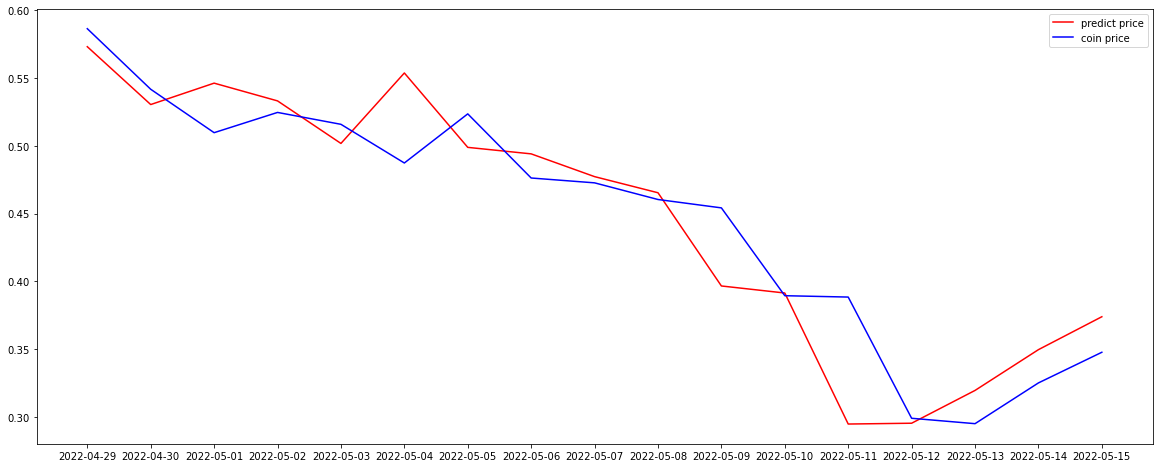

In [12]:
gfmodel.visualize()

In [13]:
result.to_csv('WAVES_result_data')
gfmodel.save_csv('WAVES_Visulize_data')